In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import ochumanApi.ochuman as ochuman

print(torch.cuda.is_available())
print(torch.version.cuda)

True
11.7


In [2]:
class OCHumanDataset(Dataset):
    def __init__(self, img_dir, annFile):
        self.img_dir = img_dir
        self.ochuman = ochuman.OCHuman(annFile)
        # self.transforms = transforms.Compose([transforms.Resize((256, 256)), 
        #                                       transforms.Lambda(lambda x: x[[2, 0, 1]]), 
        #                                       transforms.ToTensor(), 
        #                                     #   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        #                                     ])

    def __len__(self):
        return len(self.ochuman.getImgIds())

    def __getitem__(self, idx):
        img_id = self.ochuman.getImgIds()[idx]
        img = self.ochuman.visImg(self.img_dir, img_id)
        img = self.ochuman.visImg(self.img_dir, img_id)
        img = cv2.resize(img, (256, 256))
        img = img.transpose((2, 0, 1))
        img = torch.from_numpy(img)
        img = img.float()
        img = img / 255.0
        # img = img - 0.5
        # img = img / 0.5
        img = img.unsqueeze(0)
        # print (img.shape)
        return img


class OCHumanDataModule(pl.LightningDataModule):
    def __init__(self, img_dir, annFile, batch_size=32):
        super().__init__()
        self.img_dir = img_dir
        self.annFile = annFile
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.dataset = OCHumanDataset(self.img_dir, self.annFile)

    def train_dataloader(self):
        return DataLoader(self.dataset, batch_size=self.batch_size)

    # def val_dataloader(self):
        # return DataLoader(self.dataset, batch_size=self.batch_size)

    # def test_dataloader(self):
        # return DataLoader(self.dataset, batch_size=self.batch_size)
        
    def show_sample_images(self):
        fig, axs = plt.subplots(1, self.batch_size, figsize=(10, 10))
        examples = next(iter(self.train_dataloader()))
        for idx, img in enumerate(examples):
            img = img.squeeze().numpy().astype(np.float64)
            img = img.transpose((1, 2, 0))
            axs[idx].imshow(img[:,:,::-1])
            axs[idx].axis('off')
        plt.show()

In [3]:
ANNO_FILE='../data/ochuman/annotations/ochuman.json'
IMG_DIR = '../data/ochuman/images'
BATCH_SIZE = 5
data_module = OCHumanDataModule(IMG_DIR, ANNO_FILE, BATCH_SIZE)
data_module.setup()

In [4]:
train_DataLoader = data_module.train_dataloader()
example = next(iter(train_DataLoader))
print(example.shape)

torch.Size([5, 1, 3, 256, 256])


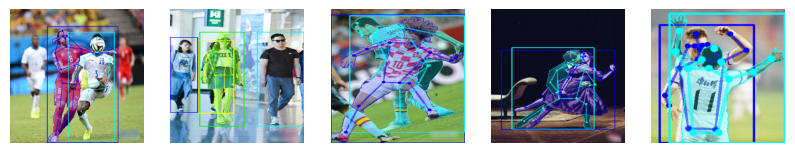

In [5]:
data_module.show_sample_images()